In [1]:
from matplotlib.pyplot import *
import numpy as np
%matplotlib notebook

In [2]:
def resonance_B (R0, a, B0, A, n):
    '''
    Return the cyclotron resonance frequencies in [MHz] 
    at LFS, R0 and HFS for a given:
        - R0: Large radius [m]
        - a: small radius [m]
        - B0: toroidal magnetic field at R0
        - A: Atomic mass number
        - n: resonance index        
    '''
    from scipy.constants import e, pi, m_p
    R = np.array([R0+a, R0, R0-a]) # HFS, axis, LFS
    B = B0*R0/R 
    f_ci = n*e*B/(2*pi*m_p*A)/1e6
    return f_ci

In [3]:
# Atomic mass
A_H = 1
A_He3= 3

## Tore Supra parameters    
#R0 = 2.4 # m
#a = 0.72 # m
#source_frequencies = [42, 48, 57, 63, 76]

# WEST parameters    
R0 = 2.5 # m
a = 0.5 # m
# RF Generator pre-set frequencies
source_frequencies = [48, 53, 55.5, 57, 63]

In [4]:
# Calculates the cyclotron frequencies at 3 radius vs B
B0s = np.linspace(1,5,10)
f_cis_2H, f_cis_1H, f_cis_2He3 = [], [], []
for b in B0s:
    f_cis_1H.append(resonance_B(R0, a, B0=b, A=A_H, n=1))
    f_cis_2H.append(resonance_B(R0, a, B0=b, A=A_H, n=2))
    f_cis_2He3.append(resonance_B(R0, a, B0=b, A=A_He3, n=2))  
f_cis_1H = np.array(f_cis_1H)
f_cis_2H = np.array(f_cis_2H)
f_cis_2He3 = np.array(f_cis_2He3)

<IPython.core.display.Javascript object>


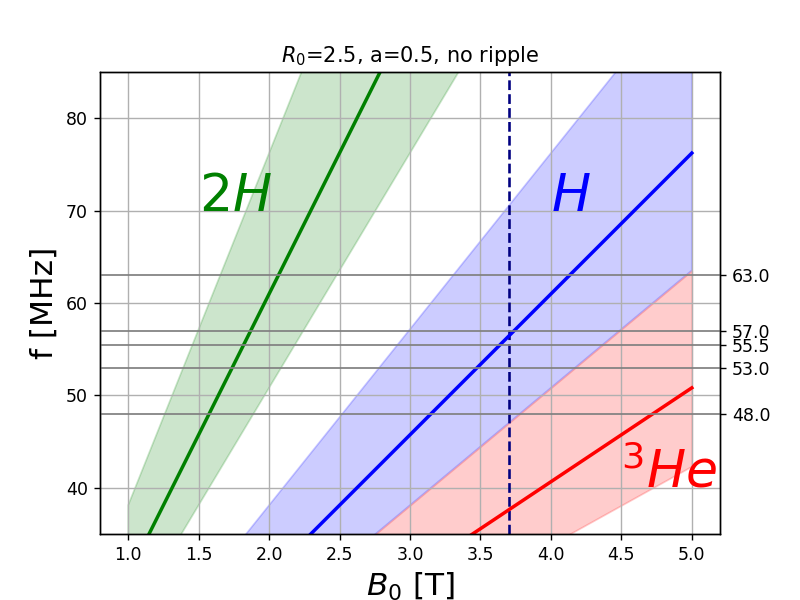

In [5]:
# Plotting
fig, ax=subplots()
# 1H
fill_between(B0s, f_cis_1H[:,0], f_cis_1H[:,2], alpha=0.2, color='b')
plot(B0s, f_cis_1H[:,1], lw=2, color='b')
text(4,70, '$H$', color='b', fontsize=30)

# 2H
fill_between(B0s, f_cis_2H[:,0], f_cis_2H[:,2], alpha=0.2, color='g')
plot(B0s, f_cis_2H[:,1], lw=2, color='g')
text(1.5,70, '$2H$', color='g', fontsize=30)
# 2He3
fill_between(B0s, f_cis_2He3[:,0], f_cis_2He3[:,2], alpha=0.2, color='r')
plot(B0s, f_cis_2He3[:,1], lw=2, color='r')
text(4.5,40, '$^3He$', color='r', fontsize=30)

ax.set_xlabel('$B_0$ [T]', fontsize=18)
#ax.set_xticks([1, 2, 3, 4, 5])
ax.set_ylabel('f [MHz]', fontsize=18)
ax.set_ylim(35,85)
ax.grid(True)
title('$R_0$={}, a={}, no ripple'.format(R0, a))
# RF Generator frequencies
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(source_frequencies)
ax2.grid(True, color='gray', linestyle='-', linewidth=1)

ax.vlines(3.7, 35, 85, linestyles='--', color='navy')